In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
data = np.random.normal(50,15,200)  #np.random.nomal(mean,std,no.of elements)

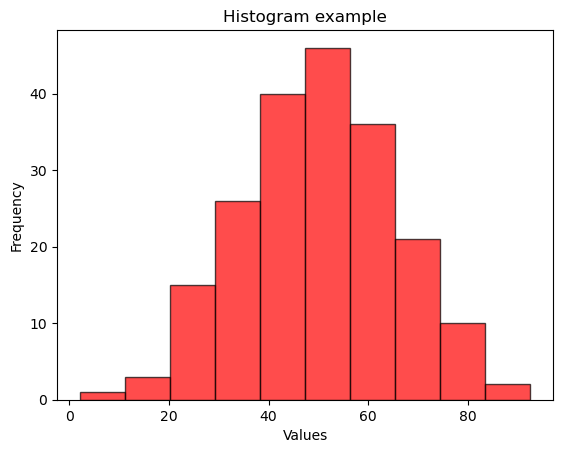

In [97]:
plt.hist(data,bins=10,color='red',edgecolor='black',alpha=0.7) ##alpha is for color density
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram example")
plt.show()

In [92]:
import seaborn as sns

In [161]:
np.random.seed(42) #for saving this random state
data1 = np.random.normal(50,15,200)

In [163]:
data1

array([57.4507123 , 47.92603548, 59.71532807, 72.84544785, 46.48769938,
       46.48794565, 73.68819223, 61.51152094, 42.95788421, 58.13840065,
       43.04873461, 43.0140537 , 53.62943407, 21.30079633, 24.12623251,
       41.56568706, 34.80753319, 54.71370999, 36.37963887, 28.81544448,
       71.98473153, 46.61335549, 51.01292307, 28.62877721, 41.83425913,
       51.66383885, 32.73509634, 55.63547028, 40.99041965, 45.62459375,
       40.97440082, 77.78417277, 49.79754163, 34.13433607, 62.33817368,
       31.68734525, 53.13295393, 20.60494814, 30.07720927, 52.95291854,
       61.0769987 , 52.57052422, 48.26527576, 45.48344457, 27.82217014,
       39.20233687, 43.09041844, 65.85683339, 55.15427434, 23.55439767,
       54.86125954, 44.22376579, 39.84617   , 59.17514433, 65.46499284,
       63.96920179, 37.41173715, 45.36181436, 54.96895147, 64.63317691,
       42.81238643, 47.21511535, 33.40497539, 32.05690064, 62.18788734,
       70.34360043, 48.91984818, 65.05299347, 55.42454038, 40.32

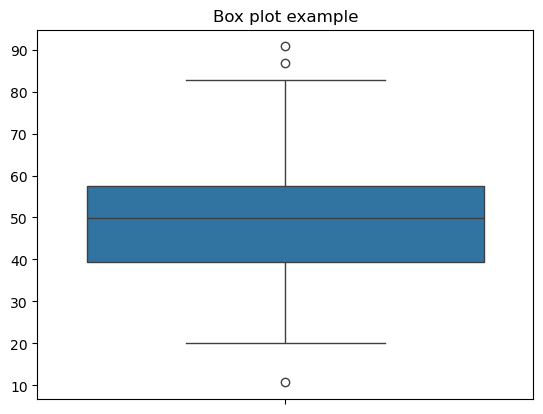

In [197]:
sns.boxplot(data=data1)
plt.title("Box plot example")
plt.show()

In [183]:
q1 = np.percentile(data1,25)
q1

39.42308487628091

In [185]:
q3 = np.percentile(data1,75)
q3

57.51278709555145

In [187]:
iqr = q3-q1
iqr

18.089702219270542

In [189]:
min_val = q1-1.5*iqr
max_val = q3+1.5*iqr
print(min_val,max_val)

12.288531547375097 84.64734042445727


In [199]:
for i in data1:
    if i<min_val or i>max_val:
        print(i)

10.703823438653835
86.94863168727929
90.80253749884429


### Simple Random Sampling

In [217]:
import random

population = list(range(1,1001))
sample = random.sample(population,100)
# print(population,sample)

### Systematic sampling

In [206]:
k=10
sample = population[::k]
print(sample)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511, 521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641, 651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771, 781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901, 911, 921, 931, 941, 951, 961, 971, 981, 991]


### Point estimation

In [223]:
point_estimate = np.mean(sample) #here we estimate that population mean will same as sample mean
print(point_estimate,np.mean(population))

459.82 500.5


### Interval Estimation

x = 1 1 1 1 1 
Standard Deviation = 0 . 

y = 9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9,
4 
Step 1 : Mean of distribution 4 = 7
Step 2 : Summation of (x - x.mean())**2 = 178
Step 3 : Finding Mean = 178 /20 = 8.9 
This Result is Variance.
Step 4 : Standard Deviation = sqrt(Variance) = sqrt(8.9) = 2.983..

In [7]:
import scipy.stats as stats

In [265]:
sample = [1.4, 1.6, 1.5, 1.55, 1.45, 1.52, 1.48, 1.51]
n = len(sample)
mean= np.mean(sample)
std_dev = np.std(sample,ddof=1) #ddof - Means Delta Degrees of Freedom. N - ddof,where N represents the number of elements. By default ddof is zero
confidence_level = 0.95
z_score = stats.norm.ppf((1+confidence_level)/2)

margin_error = z_score*(std_dev/np.sqrt(n))


In [267]:
lower_bound = mean-margin_error
upper_bound = mean+margin_error
print(lower_bound,mean,upper_bound)

1.4591095534422773 1.50125 1.5433904465577226


### T-test One Sample

In [300]:
sample_data = [9.5, 10.1, 9.8, 9.6, 9.2, 10.3, 9.7, 9.4, 9.9, 10.0]
pop_mean = 10

In [302]:
t_stat,p_value = stats.ttest_1samp(sample_data,pop_mean)

print(f"T-statistics: {t_stat:.3f} , p_value:{p_value:.3f}")

alpha = 0.05
if p_value<alpha:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

T-statistics: -2.343 , p_value:0.044
Reject null hypothesis


# Hypothesis testing without built in functions

## Z-test

In [46]:
from scipy.stats import norm

def z_test(sample,population_mean,population_std,alpha=0.05):
    n = len(sample)
    sample_mean = sum(sample)/n
    #compute z-score
    z_score  = (sample_mean - population_mean)/(population_std/(n)**(1/2))
    #compute critical value(from z-table)
    z_critical = norm.ppf(1-alpha/2)
    #Decision
    if abs(z_score)>z_critical:
        return f"Reject H0 as Z={z_score:.3f}, Critical={z_critical:.3f}"
    else:
        return f"Accept H0 as Z={z_score:.3f}, Critical={z_critical:.3f}"

In [48]:
sample = [50,52,49,51,53,48,47,52]
population_mean =50
population_std = 5
print(z_test(sample,population_mean,population_std))

Accept H0 as Z=0.141, Critical=1.960


## T-test

In [23]:
from scipy.stats import t

def t_test(sample, population_mean,alpha=0.05):
    n = len(sample)
    sample_mean=sum(sample)/n
    df=n-1
    sample_std=(sum([(x-sample_mean)**2 for x in sample])/(n-1))**0.5
    print(sample_std,"std")
    #compute T-score
    t_score = (sample_mean - population_mean)/(sample_std/(n**0.5))
    #Compute critical value
    t_critical = t.ppf(1-alpha/2,df)
    #decision 
    if abs(t_score)>t_critical:
        return f"Reject H0 as T={t_score:.3f}, Critical={t_critical:.3f}"
    else:
        return f"Accept H0 as T={t_score:.3f}, Critical={t_critical:.3f}"

In [25]:
sample = [23,20,19,25,30,22,18,26]
population_mean = 22
print(t_test(sample,population_mean))

4.0155946010522525 std
Accept H0 as T=0.616, Critical=2.365


In [397]:
np.std(sample,ddof=1)

4.0155946010522525

## Chi-Square-test

In [27]:
from scipy.stats import chi2

def chi_square_test(observed, expected, alpha = 0.05):
    chi_square = sum([(o-e)**2/e for o,e in zip(observed,expected)])
    #compute critical value from chi-square table
    df = len(observed)-1
    chi_critical = chi2.ppf(1-alpha,df)
    #decision
    if chi_square>chi_critical:
        return f"Reject H0 as Chi-Square = {chi_square:.3f}, Critical={chi_critical:.3f}"
    else:
        return f"Accpet H0 as Chi-Square = {chi_square:.3f}, Critical={chi_critical:.3f}"

In [29]:
observed = [50,30,20]
expected = [40,40,20]
print(chi_square_test(observed,expected))

Accpet H0 as Chi-Square = 5.000, Critical=5.991


## ANOVA - Test

In [50]:
from scipy.stats import f
def anova(*groups,alpha=0.05):
    k=len(groups) #number of groups
    # print(f"K:{k}")
    n=sum(len(g) for g in groups) #total distributions
    # print(f"n:{n}")
    overall_mean = sum(sum(g) for g in groups)/n
    print(f"overall_mean:{overall_mean}")
    #between-group vaariance
    ss_between = sum(len(g)*(sum(g)/len(g)-overall_mean)**2 for g in groups)
    ms_between = ss_between/(k-1)
    #within-group variance
    ss_within = sum(sum((x-sum(g)/len(g))**2 for x in g) for g in groups)
    ms_within = ss_within /(n-k)
    #compute F-statistic
    F = ms_between/ms_within
    #compute critical value
    df1 = k-1
    df2 = n-k

    F
    
    F_critical = f.ppf(1-alpha,df1,df2)
    #decision
    if F>F_critical:
        return f'Reject H0 as F={F:.3f}, Critical = {F_critical:.3f}'
    else:
        return f'Accpet H0 as F={F:.3f}, Critical = {F_critical:.3f}'

In [52]:
group1 = [88,92,85,91,87]
group2=[78,75,80,79,83]
group3=[90,89,94,92,88]
print(anova(group1,group2,group3))

overall_mean:86.06666666666666
Reject H0 as F=25.522, Critical = 3.885


In [260]:
import math
from scipy.stats import ttest_1samp, chi2_contingency, f_oneway, norm
import numpy as np

def z_test(sample, population_mean, population_std, alpha=0.05):
    sample_mean = np.mean(sample)
    n = len(sample)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return f"Z-score: {z_score:.3f}, p-value: {p_value:.3f}, Decision: {decision}"

def t_test(sample, population_mean, alpha=0.05):
    t_score, p_value = ttest_1samp(sample, population_mean)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return f"T-score: {t_score:.3f}, p-value: {p_value:.3f}, Decision: {decision}"

def chi_square_test(observed, expected, alpha=0.05):
    chi_square = sum([(o - e) ** 2 / e for o, e in zip(observed, expected)])
    df = len(observed) - 1  # Degrees of freedom
    p_value = 1 - chi2.cdf(chi_square, df)  # Compute p-value
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return f"Chi-Square: {chi_square:.3f}, p-value: {p_value:.3f}, Decision: {decision}"

def anova(*groups, alpha=0.05):
    f_statistic, p_value = f_oneway(*groups)
    decision = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    return f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}, Decision: {decision}"

# Example Usage
sample = [50, 52, 49, 51, 53, 48, 47, 52]
population_mean = 50
population_std = 5
print(z_test(sample, population_mean, population_std))

sample_t = [23, 20, 19, 25, 30, 22, 18, 26]
population_mean_t = 22
print(t_test(sample_t, population_mean_t))

observed = [50, 30, 20]
expected = [40, 40, 20]
print(chi_square_test(observed, expected))

group1 = [88, 92, 85, 91, 87]
group2 = [78, 75, 80, 79, 83]
group3 = [90, 89, 94, 92, 88]
print(anova(group1, group2, group3))


Z-score: 0.141, p-value: 0.888, Decision: Fail to Reject H0
T-score: 0.616, p-value: 0.557, Decision: Fail to Reject H0
Chi-Square: 5.000, p-value: 0.082, Decision: Fail to Reject H0
F-statistic: 25.522, p-value: 0.000, Decision: Reject H0


In [ ]:
Accept H0 as Z=0.141, Critical=1.960
Accept H0 as T=0.616, Critical=2.365
Accpet H0 as Chi-Square = 5.000, Critical=5.991
Reject H0 as F=25.522, Critical = 3.885

In [54]:
def chi_square_test(observed, expected, alpha=0.05):
    chi_square = sum([(o - e) ** 2 / e for o, e in zip(observed, expected)])
    df = len(observed) - 1
    chi_critical = chi2.ppf(1 - alpha, df)
    decision = "Reject H0" if chi_square > chi_critical else "Fail to Reject H0"
    return f"Chi-Square: {chi_square:.3f}, Critical: {chi_critical:.3f}, Decision: {decision}"

In [56]:
observed = [50, 30, 20]
expected = [40, 40, 20]
print(chi_square_test(observed, expected))

Chi-Square: 5.000, Critical: 5.991, Decision: Fail to Reject H0


# Z test One Sample

In [249]:
from scipy.stats import norm

def z_test(sample,population_mean,population_std,alpha=0.05):
    n=len(sample)
    sample_mean = sum(sample)/n
    #compute z_score
    z_score = (sample_mean - population_mean)/(population_std/(n)**0.5)
    #compute critical value (from z_table)
    z_critical = norm.ppf(1-alpha/2)
    #decision
    if abs(z_score)>z_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f"Z={z_score:.3f},Critical={z_critical:.3f}"
sample = [50,52,49,51,53,48,47,52]
population_mean=50
population_std=5
print(z_test(sample,population_mean,population_std))

Accept H0
Z=0.141,Critical=1.960


In [303]:
from scipy.stats import norm

def test(sample,population_mean,population_std,alpha=0.05):
    n=len(sample)
    sample_mean = sum(sample)/n
    #compute z_Score
    z_score = (sample_mean-population_mean)/(population_std/(n**0.5))
    #from z-table
    z_critical = norm.ppf(1-alpha/2)
    if abs(z_score)>z_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f'Z_score:{z_score:.3f},critical:{z_critical:.3f}'

sample = [50,52,49,51,53,48,47,52]
population_mean=50
population_std=5
print(test(sample,population_mean,population_std))

Accept H0
Z_score:0.141,critical:1.960


# T-test One Sample

In [254]:
from scipy.stats import t

def t_test(sample,population_mean,alpha=0.05):
    n=len(sample)
    sample_mean = sum(sample)/n
    df=n-1
    sample_std = (sum([(x-sample_mean)**2 for x in sample])/(n-1))**0.5
    print(sample_std,'std')
    #compute t_score
    t_score = (sample_mean - population_mean)/(sample_std/(n**0.5))
    #compute critical value
    t_critical = t.ppf(1-alpha/2,df)
    #decision
    if abs(t_score)>t_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f'T={t_score:.3f}, Critical={t_critical:.3f}'
sample = [23,20,19,25,30,22,18,26]
population_mean = 22
print(t_test(sample,population_mean))

4.0155946010522525 std
Accept H0
T=0.616, Critical=2.365


In [319]:
from scipy.stats import t

def test(sample,population_mean,alpha=0.05):
    n=len(sample)
    sample_mean = sum(sample)/n
    sample_std = (sum([(x-sample_mean)**2 for x in sample])/(n-1))**0.5
    print(sample_std)
    #compute t_score
    t_score = (sample_mean - population_mean)/(sample_std/(n**0.5))
    df = n-1
    #compute from ttable
    t_critical = t.ppf(1-alpha/2,df)
    if abs(t_score)>t_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f'T_score:{t_score:.3f},Critical:{t_critical:.3f}'

sample = [23,20,19,25,30,22,18,26]
population_mean = 22
print(test(sample,population_mean))

4.0155946010522525
Accept H0
T_score:0.616,Critical:2.365


In [307]:
np.std(sample)

3.75624480032918

# Chi Square One Sample

In [287]:
from scipy.stats import chi2

def chi_square(observed,expected,alpha=0.05):
    chi_square = sum([(o-e)**2/e for o,e in zip(observed,expected)])
    #compute critical value from chi square table
    df = len(observed)-1
    chi_critical = chi2.ppf(1-alpha,df)
    #decision
    if chi_square>chi_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f'Chi-Square={chi_square:.3f}, Critical={chi_critical:.3f}'

observed=[50,30,20]
expected=[40,40,20]
print(chi_square(observed,expected))
    

Accept H0
Chi-Square=5.000, Critical=5.991


In [335]:
from scipy.stats import chi2

def test(observed,excepted,alpha=0.05):
    chi_square = sum([(o-e)**2/e for o,e in zip(observed,expected)])
    #chi from table
    df = len(observed)-1
    chi_critical = chi2.ppf(1-alpha,df)
    if chi_square>chi_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f'Chi-square:{chi_square:.3f},Critical:{chi_critical:.3f}'
observed=[50,30,20]
expected=[40,40,20]
print(test(observed,expected))

Accept H0
Chi-square:5.000,Critical:5.991


# ANOVA Sample

In [345]:
from scipy.stats import f

def anova(*groups,alpha=0.05):
    k = len(groups)
    n=sum(len(g) for g in groups)
    overall_mean = sum(sum(g) for g in groups)/n
    # ss_between
    ss_between = sum(len(g)*(sum(g)/len(g)-overall_mean)**2 for g in groups)
    ms_between = ss_between/(k-1)
    #ss_within
    ss_within = sum(sum((x-sum(g)/len(g))**2 for x in g)for g in groups)
    ms_within = ss_within/(n-k)
    #compute F
    F = ms_between/ms_within
    #compute critical
    df1=k-1
    df2=n-k
    F_critical = f.ppf(1-alpha,df1,df2)
    if F>F_critical:
        print("Reject H0")
    else:
        print("Accept H0")
    return f'F={F:.3f},Critical = {F_critical:.3f}'


group1 = [88,92,85,91,87]
group2=[78,75,80,79,83]
group3=[90,89,94,92,88]
print(anova(group1,group2,group3))

Reject H0
F=25.522,Critical = 3.885


In [437]:
from scipy.stats import f

def test(*groups,alpha=0.05):
    k =len(groups)
    n=sum(len(g) for g in groups)
    overall_mean = sum(sum(g) for g in groups)/n
    df1 = k-1
    df2 = n-k
    #between 
    ss_between = sum(len(g)*(sum(g)/len(g)-overall_mean)**2 for g in groups)
    ms_between = ss_between/df1
    #within
    ss_within = sum(sum((x-sum(g)/len(g))**2 for x in g)for g in groups)
    ms_within = ss_within/df2
    #F
    F = ms_between/ms_within
    F_c = f.ppf(1-alpha,df1,df2)
    if F>F_c:
        print("reject")
    else:
        print("accept")
    return F,F_c

In [443]:
group1 = [9,8,7,8,8,9,8]
group2=[7,6,6,7,8,7,6]
group3=[4,3,2,3,4,3,2]
print(test(group1,group2,group3))

reject
(86.33333333333333, 3.554557145661787)


# Expected Practicals

Conditional Probability: 0.33333333333333337
Bayes' Theorem: 0.5599999999999999


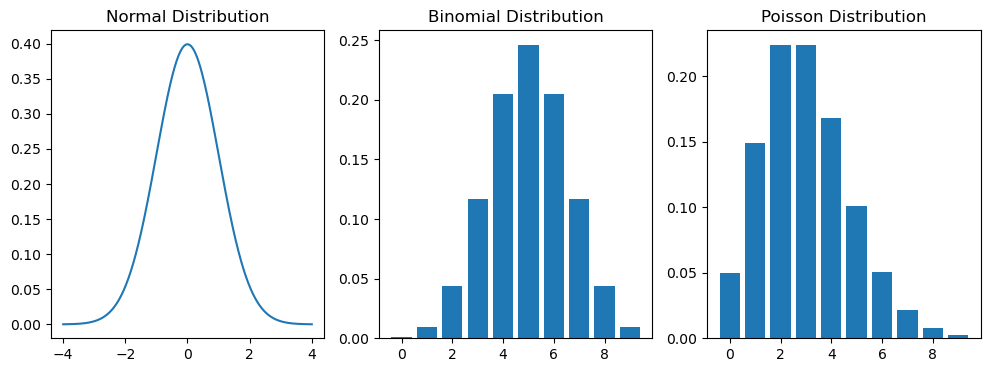

Mean: 54.2, Median: 53.0, Mode: <function mode at 0x000001CC87272FC0>
Variance: 855.469387755102, Standard Deviation: 29.248408294385904
Skewness: -0.134632541764683, Kurtosis: -1.0300805285824268


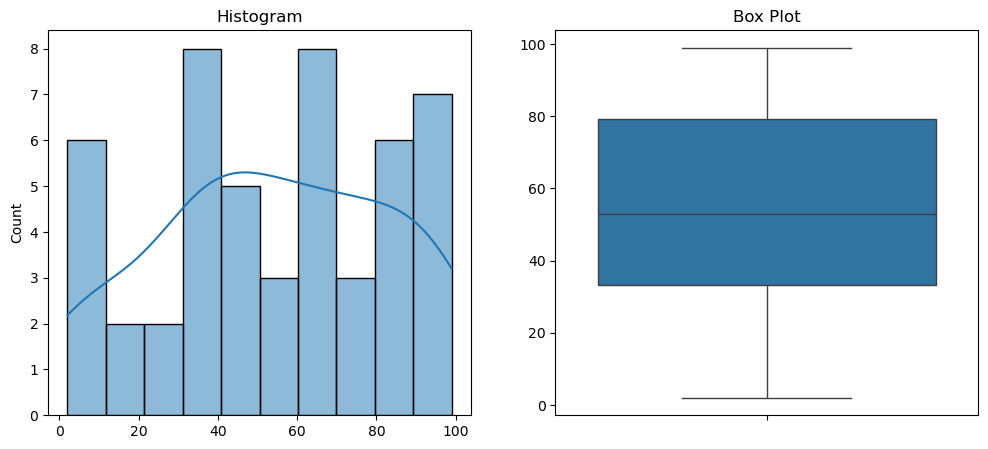

Random Sample: [89 99 45 44 45 61 28 85 82 97]
Confidence Interval: (45.8876943344803, 62.512305665519705)


In [650]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Conditional Probability (Example: P(A|B) = P(A and B) / P(B))
def conditional_probability(p_a, p_b, p_a_and_b):
    return p_a_and_b / p_b

# 2. Bayes' Theorem (P(A|B) = P(B|A) * P(A) / P(B))
def bayes_theorem(p_a, p_b_given_a, p_b):
    return (p_b_given_a * p_a) / p_b

# 3. Probability Distributions (Normal, Binomial, Poisson)
def plot_distributions():
    x = np.linspace(-4, 4, 1000)
    normal_dist = stats.norm.pdf(x, 0, 1)
    binomial_dist = stats.binom.pmf(range(10), 10, 0.5)
    poisson_dist = stats.poisson.pmf(range(10), 3)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(x, normal_dist, label='Normal Dist')
    plt.title('Normal Distribution')
    
    plt.subplot(1, 3, 2)
    plt.bar(range(10), binomial_dist, label='Binomial Dist')
    plt.title('Binomial Distribution')
    
    plt.subplot(1, 3, 3)
    plt.bar(range(10), poisson_dist, label='Poisson Dist')
    plt.title('Poisson Distribution')
    
    plt.show()

# 4. Descriptive Statistics
sample_data = np.random.randint(1, 100, 50)
mean = np.mean(sample_data)
median = np.median(sample_data)
# mode = stats.mode(sample_data)[0][0]
variance = np.var(sample_data, ddof=1)
std_dev = np.std(sample_data, ddof=1)
skewness = stats.skew(sample_data)
kurtosis = stats.kurtosis(sample_data)

# 5. Data Visualization (Histograms & Box Plots)
def plot_visualizations(data):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=10, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data)
    plt.title('Box Plot')
    
    plt.show()

# 6. Sampling Techniques (Random Sampling)
def random_sampling(data, sample_size):
    return np.random.choice(data, sample_size, replace=False)

# 7. Confidence Interval (for mean, assuming normal distribution)
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return interval

# Running examples
print("Conditional Probability:", conditional_probability(0.4, 0.6, 0.2))
print("Bayes' Theorem:", bayes_theorem(0.4, 0.7, 0.5))
plot_distributions()
print(f"Mean: {mean}, Median: {median}, Mode: {mode}")
print(f"Variance: {variance}, Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")
plot_visualizations(sample_data)
sample = random_sampling(sample_data, 10)
print("Random Sample:", sample)
print("Confidence Interval:", confidence_interval(sample_data))


# Expected Practicals without built in

In [450]:
def conditional_probab(p_a_and_b,p_b):
    return p_a_and_b/p_b
print(conditional_probab(0.2,0.6))

0.33333333333333337


In [452]:
def bayes_theorem(p_a,p_b_given_a,p_b):
    return(p_b_given_a*p_a)/p_b
print(bayes_theorem(0.4,0.7,0.5))

0.5599999999999999


In [456]:
def mean(data):
    return sum(data)/len(data)
print(mean(data))

14.9


In [474]:
def median(data):
    data=sorted(data)
    n =len(data)
    middle=n//2
    if n%2==0:
        return (data[middle-1]+data[middle])/2
    else:
        return data[middle]
median(data)

14.5

In [540]:
def mode(data):
    frequency={}
    for num in data:
        frequency[num]=frequency.get(num,0)+1
    max_freq = max(frequency.values())
    modes=[key for key,val in frequency.items() if val==max_freq]
    return modes if len(modes)>1 else modes[0]
mode(data)

14

In [544]:
def variance(data):
    mean = sum(data)/len(data)
    squared_diff = [(x-mean)**2 for x in data]
    return sum(squared_diff)/(len(data)-1)

variance(data)

8.766666666666667

In [554]:
def standard_deviation(data):
    mean = sum(data)/len(data)
    squared_diff = [(x-mean)**2 for x in data]
    return (sum(squared_diff)/(len(data)-1))**0.5
print(standard_deviation(data))

2.960855732160327


In [610]:
def skewness(data):
    n=len(data)
    mean = sum(data)/n
    numerator = sum((x-mean)**3 for x in data)/n
    denominator = (sum((x-mean)**2 for x in data)/n)**1.5
    return numerator/denominator
print(skewness(data))

0.10233578973549996


In [634]:
def kurt(data):
    mean_value = mean(data)
    n = len(data)
    numerator = sum((x - mean_value) ** 4 for x in data) / n
    denominator = (sum((x - mean_value) ** 2 for x in data) / n) ** 2
    return numerator / denominator
print(kurt(data))

2.3313864110608313


In [636]:
stats.kurtosis(data)

-0.6686135889391687

In [644]:
def confidence_interval(data,confidence=0.95):
    n = len(data)
    mean = sum(data)/n
    std_dev = standard_deviation(data)
    z_score = norm.ppf((1+confidence)/2)
    margin_of_error = z_score*(std_dev/(n**0.5))
    return mean-margin_of_error,mean,mean+margin_of_error
print(confidence_interval(data))

1.959963984540054
(13.064876325836543, 14.9, 16.735123674163457)


In [626]:
data = [12, 15, 14, 10, 18, 20, 14, 16, 17, 13]

In [472]:
np.median(data)

14.5

In [646]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return interval,mean
print(confidence_interval(data))

((12.781931404363949, 17.018068595636052), 14.9)


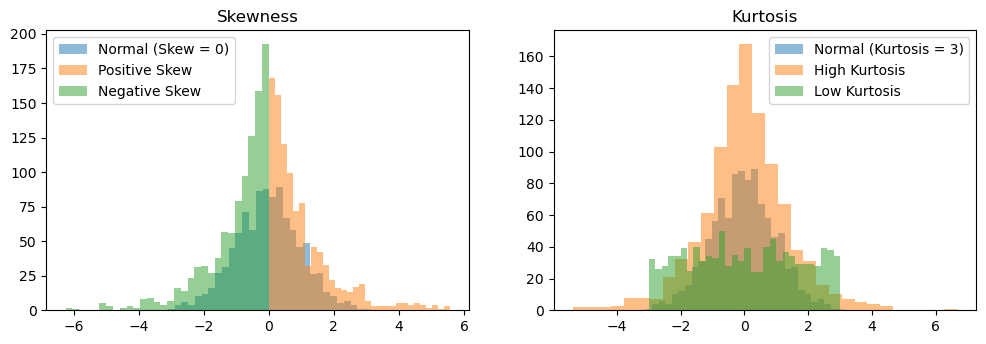

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data
data_normal = np.random.normal(0, 1, 1000)  # Normal distribution
data_positive_skew = np.random.exponential(1, 1000)  # Right-skewed
data_negative_skew = -np.random.exponential(1, 1000)  # Left-skewed
data_high_kurtosis = np.random.laplace(0, 1, 1000)  # High kurtosis
data_low_kurtosis = np.random.uniform(-3, 3, 1000)  # Low kurtosis

# Plot
plt.figure(figsize=(12, 8))

# Skewness
plt.subplot(2, 2, 1)
plt.hist(data_normal, bins=30, alpha=0.5, label='Normal (Skew = 0)')
plt.hist(data_positive_skew, bins=30, alpha=0.5, label='Positive Skew')
plt.hist(data_negative_skew, bins=30, alpha=0.5, label='Negative Skew')
plt.legend()
plt.title('Skewness')

# Kurtosis
plt.subplot(2, 2, 2)
plt.hist(data_normal, bins=30, alpha=0.5, label='Normal (Kurtosis = 3)')
plt.hist(data_high_kurtosis, bins=30, alpha=0.5, label='High Kurtosis')
plt.hist(data_low_kurtosis, bins=30, alpha=0.5, label='Low Kurtosis')
plt.legend()
plt.title('Kurtosis')

plt.show()

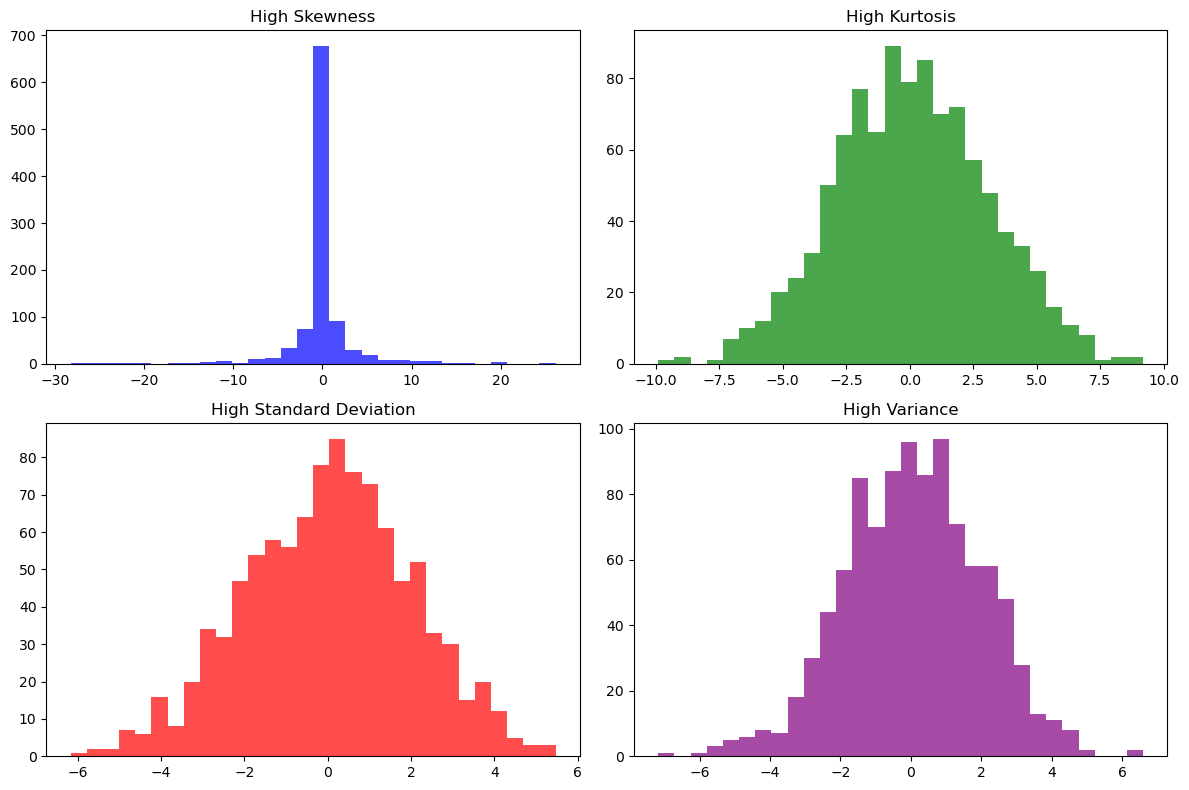

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate data with different skewness
def generate_skewed_data(size, skewness):
    data = np.random.randn(size) ** skewness
    return data

# Function to generate data with different kurtosis
def generate_kurtosis_data(size, kurtosis_factor):
    data = np.random.randn(size) * kurtosis_factor
    return data

# Function to generate data with different standard deviations
def generate_std_dev_data(size, std_dev):
    data = np.random.normal(0, std_dev, size)
    return data

# Function to generate data with different variances
def generate_variance_data(size, variance):
    data = np.random.normal(0, variance ** 0.5, size)
    return data

# Plot graphs
def plot_graphs():
    size = 1000
    plt.figure(figsize=(12, 8))
    
    # Skewness
    plt.subplot(2, 2, 1)
    data = generate_skewed_data(size, 3)
    plt.hist(data, bins=30, alpha=0.7, color='blue')
    plt.title("High Skewness")
    
    # Kurtosis
    plt.subplot(2, 2, 2)
    data = generate_kurtosis_data(size, 3)
    plt.hist(data, bins=30, alpha=0.7, color='green')
    plt.title("High Kurtosis")
    
    # Standard Deviation
    plt.subplot(2, 2, 3)
    data = generate_std_dev_data(size, 2)
    plt.hist(data, bins=30, alpha=0.7, color='red')
    plt.title("High Standard Deviation")
    
    # Variance
    plt.subplot(2, 2, 4)
    data = generate_variance_data(size, 4)
    plt.hist(data, bins=30, alpha=0.7, color='purple')
    plt.title("High Variance")
    
    plt.tight_layout()
    plt.show()

# Run the function
plot_graphs()


C:\Users\anant\AppData\Local\Temp\ipykernel_3652\756685949.py:12: RuntimeWarning: invalid value encountered in sqrt
  return data ** kurtosis_factor


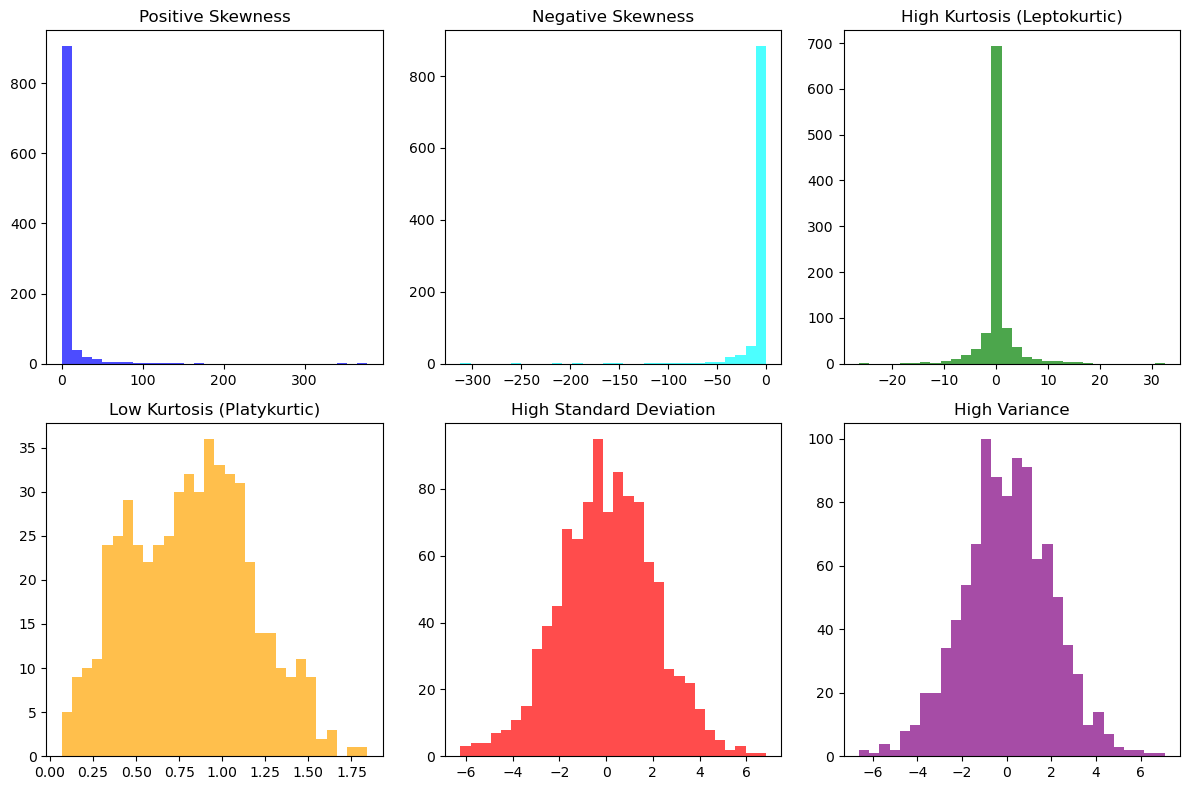

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate data with different types of skewness
def generate_skewed_data(size, skewness):
    data = np.random.randn(size) * skewness
    return np.exp(data) if skewness > 0 else -np.exp(data)

# Function to generate data with different types of kurtosis
def generate_kurtosis_data(size, kurtosis_factor):
    data = np.random.randn(size)
    return data ** kurtosis_factor

# Function to generate data with different standard deviations
def generate_std_dev_data(size, std_dev):
    data = np.random.normal(0, std_dev, size)
    return data

# Function to generate data with different variances
def generate_variance_data(size, variance):
    data = np.random.normal(0, variance ** 0.5, size)
    return data

# Plot graphs
def plot_graphs():
    size = 1000
    plt.figure(figsize=(12, 8))
    
    # Positive Skewness
    plt.subplot(2, 3, 1)
    data = generate_skewed_data(size, 2)
    plt.hist(data, bins=30, alpha=0.7, color='blue')
    plt.title("Positive Skewness")
    
    # Negative Skewness
    plt.subplot(2, 3, 2)
    data = generate_skewed_data(size, -2)
    plt.hist(data, bins=30, alpha=0.7, color='cyan')
    plt.title("Negative Skewness")
    
    # High Kurtosis (Leptokurtic)
    plt.subplot(2, 3, 3)
    data = generate_kurtosis_data(size, 3)
    plt.hist(data, bins=30, alpha=0.7, color='green')
    plt.title("High Kurtosis (Leptokurtic)")
    
    # Low Kurtosis (Platykurtic)
    plt.subplot(2, 3, 4)
    data = generate_kurtosis_data(size, 0.5)
    plt.hist(data, bins=30, alpha=0.7, color='orange')
    plt.title("Low Kurtosis (Platykurtic)")
    
    # Standard Deviation
    plt.subplot(2, 3, 5)
    data = generate_std_dev_data(size, 2)
    plt.hist(data, bins=30, alpha=0.7, color='red')
    plt.title("High Standard Deviation")
    
    # Variance
    plt.subplot(2, 3, 6)
    data = generate_variance_data(size, 4)
    plt.hist(data, bins=30, alpha=0.7, color='purple')
    plt.title("High Variance")
    
    plt.tight_layout()
    plt.show()

# Run the function
plot_graphs()


C:\Users\anant\AppData\Local\Temp\ipykernel_3652\4179489072.py:12: RuntimeWarning: invalid value encountered in sqrt
  return data ** kurtosis_factor if kurtosis_factor != 1 else data


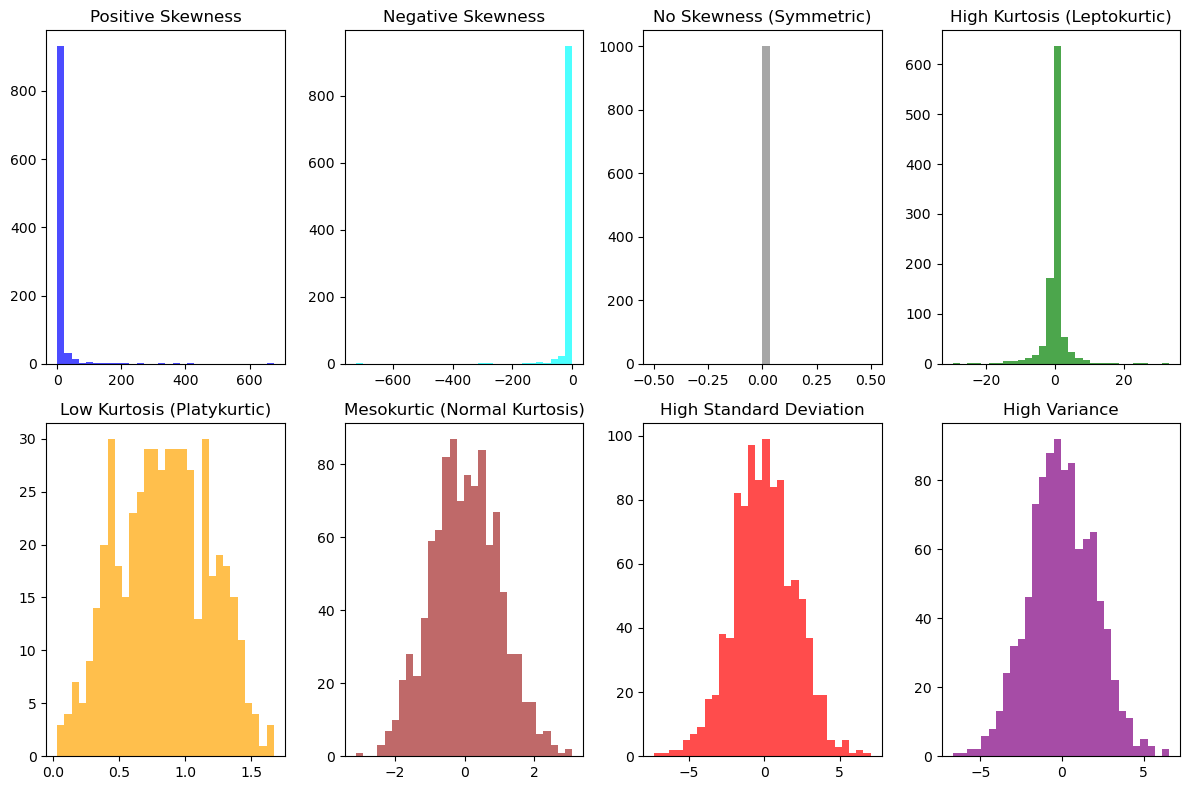

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate data with different types of skewness
def generate_skewed_data(size, skewness):
    data = np.random.randn(size) * skewness
    return np.exp(data) if skewness > 0 else -np.exp(data) if skewness < 0 else data

# Function to generate data with different types of kurtosis
def generate_kurtosis_data(size, kurtosis_factor):
    data = np.random.randn(size)
    return data ** kurtosis_factor if kurtosis_factor != 1 else data

# Function to generate data with different standard deviations
def generate_std_dev_data(size, std_dev):
    data = np.random.normal(0, std_dev, size)
    return data

# Function to generate data with different variances
def generate_variance_data(size, variance):
    data = np.random.normal(0, variance ** 0.5, size)
    return data

# Plot graphs
def plot_graphs():
    size = 1000
    plt.figure(figsize=(12, 8))
    
    # Positive Skewness
    plt.subplot(2, 4, 1)
    data = generate_skewed_data(size, 2)
    plt.hist(data, bins=30, alpha=0.7, color='blue')
    plt.title("Positive Skewness")
    
    # Negative Skewness
    plt.subplot(2, 4, 2)
    data = generate_skewed_data(size, -2)
    plt.hist(data, bins=30, alpha=0.7, color='cyan')
    plt.title("Negative Skewness")
    
    # No Skewness (Symmetric)
    plt.subplot(2, 4, 3)
    data = generate_skewed_data(size, 0)
    plt.hist(data, bins=30, alpha=0.7, color='gray')
    plt.title("No Skewness (Symmetric)")
    
    # High Kurtosis (Leptokurtic)
    plt.subplot(2, 4, 4)
    data = generate_kurtosis_data(size, 3)
    plt.hist(data, bins=30, alpha=0.7, color='green')
    plt.title("High Kurtosis (Leptokurtic)")
    
    # Low Kurtosis (Platykurtic)
    plt.subplot(2, 4, 5)
    data = generate_kurtosis_data(size, 0.5)
    plt.hist(data, bins=30, alpha=0.7, color='orange')
    plt.title("Low Kurtosis (Platykurtic)")
    
    # Mesokurtic (Normal Distribution)
    plt.subplot(2, 4, 6)
    data = generate_kurtosis_data(size, 1)
    plt.hist(data, bins=30, alpha=0.7, color='brown')
    plt.title("Mesokurtic (Normal Kurtosis)")
    
    # Standard Deviation
    plt.subplot(2, 4, 7)
    data = generate_std_dev_data(size, 2)
    plt.hist(data, bins=30, alpha=0.7, color='red')
    plt.title("High Standard Deviation")
    
    # Variance
    plt.subplot(2, 4, 8)
    data = generate_variance_data(size, 4)
    plt.hist(data, bins=30, alpha=0.7, color='purple')
    plt.title("High Variance")
    
    plt.tight_layout()
    plt.show()

# Run the function
plot_graphs()


In [41]:
import seaborn as sns
arr = np.random.normal(50,10,200)

<Axes: ylabel='Count'>

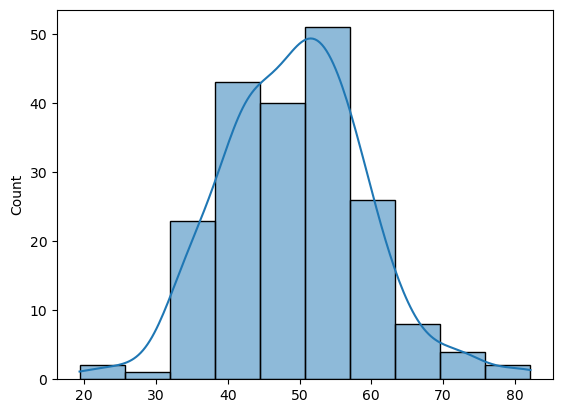

In [67]:
sns.histplot(arr,bins=10,kde=True)

<Axes: >

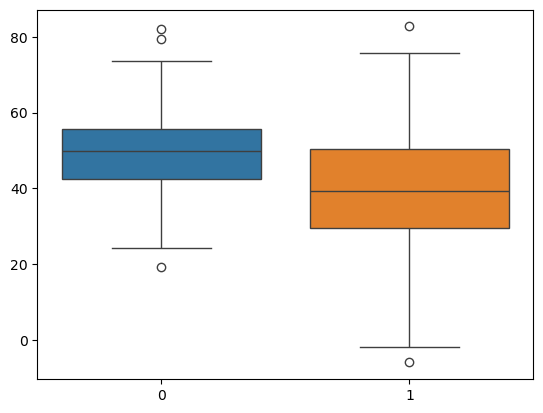

In [65]:
arr1 = np.random.normal(40,15,200)
sns.boxplot((arr,arr1))

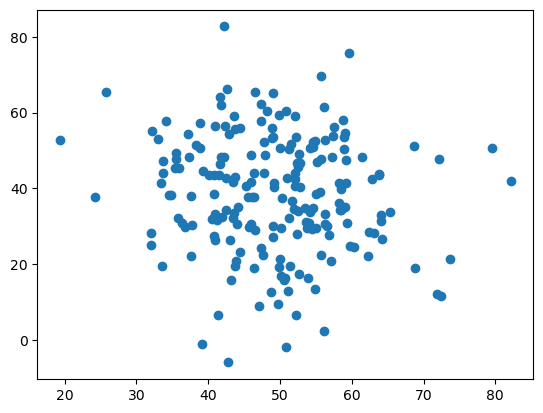

In [71]:
# plt.scatter(arr,arr1)

In [75]:
from scipy.stats import norm

def z_test(sample,population_mean,population_std,alpha=0.05):
    n =len(sample)
    sample_mean = sum(sample)/n
    #compute z score
    z_score = (sample_mean - population_mean)/(population_std/(n)**0.5)
    #z_critical
    z_critical = norm.ppd(1-alpha/2)
    #decision 
    if abs(z_score)>z_critical:
        print("reject h0")
    else:
        print("fail to reject h0")

from scipy.stats import t

def t_test(sample,population_mean,alpha=0.05):
    n =len(sample)
    sample_mean = sum(sample)/n
    df = n-1
    sample_std = (sum([(x-sample_mean)**2 for x in sample])/df)**0.5
    #t_score
    t_score = (sample_mean -population_mean)/(sample_std/(n**0.5))
    #compute critical
    t_critical = t.ppf(1-alpha/2,df)
    if abs(t_score)>t_critical:
        print("reject h0")
    else:
        print("Fail to reject H0")

from scipy.stats import chi2
def chi_square(observed,expected,alpha=0.05):
    chi_sq = sum([(o-e)**2/e for o,e in zip(observed,expected)])
    df = len(observed)-1
    chi_cri = chi2.ppf(1-alpha,df)

from scipy.stats import f

def anova(*groups,alpha =0.05):
    k =len(groups)
    n=sum(len(g) for g in groups)
    df1 = k-1
    df2 = n-k
    overall_mean = sum(sum(g) for g in groups)/n
    ss_between = sum(len(g)*(sum(g)/len(g)-overall_mean)**2 for g in groups)
    ms_between = ss_between/df1
    ss_within = sum(sum((x-sum(g)/len(g))**2 for x in g)for g in groups)
    ms_within = ss_within/df2
    F = ms_between/ms_within
    F_critical= f.ppf(1-alpha,df1,df2)
    if F>F_critical:
        print("reject h0")
    else:
        print("Fail to reject h0")
        